## Recolha de dados Financeiros: Stocks e Commodities**

### **Objetivo**
Coletar e analisar dados diários de preços de fechamento das **ações selecionadas tendo em conta o problema * e **15 commodities** para:
- Identificar relações estatísticas (cointegração).
- Agrupar ativos com comportamentos semelhantes (clustering).
- Testar estacionaridade das séries temporais.

---

### **Passos Realizados**
1. **Coleta de Dados**:
   - Uso da biblioteca `yfinance` para baixar dados diários (2020-2025).
2. **Limpeza dos Dados**:
   - Remoção de tickers inválidos ou deslistados.
3. **Próximos Passos**:
   - Análise de cointegração, clustering e testes de estacionaridade.

---

### **Ferramentas Utilizadas**
- Python com `yfinance`, `pandas`, `numpy`, `statsmodels`, `scipy` e `matplotlib`.

---

### **Exemplo de Dados**
| Date       | AAPL   | MSFT   | CL=F  | GC=F  |
|------------|--------|--------|-------|-------|
| 2020-01-02 | 72.00  | 150.00 | 61.00 | 1550.00|
| 2020-01-03 | 71.50  | 149.50 | 60.50 | 1545.00|

# 📜 Lista de Commodities e seus Tickers  

## ⚡ Energia  
- **CL=F** → Petróleo WTI (Crude Oil)  
- **BZ=F** → Petróleo Brent (Brent Crude Oil)  
- **NG=F** → Gás Natural (Natural Gas)  
- **RB=F** → Gasolina Reformulada (RBOB Gasoline)  
- **HO=F** → Óleo de Aquecimento (Heating Oil)  
- **QA=F** → Propano Mont Belvieu (Propane MB)  
- **QU=F** → Butano (Butane)  
- **QG=F** → Gás Natural Henry Hub (Natural Gas Henry Hub)  
- **QH=F** → Eletricidade PJM (PJM Electricity)  

## 🔩 Metais  
- **GC=F** → Ouro (Gold)  
- **SI=F** → Prata (Silver)  
- **HG=F** → Cobre (Copper)  
- **PL=F** → Platina (Platinum)  
- **PA=F** → Paládio (Palladium)  
- **ALI=F** → Alumínio (Aluminum - LME)  
- **LZS=F** → Zinco (Zinc - LME)  
- **LCO=F** → Níquel (Nickel - LME)  
- **LLO=F** → Chumbo (Lead - LME)  
- **FEF=F** → Minério de Ferro (Iron Ore - CME)  
- **MHC=F** → Cobre de Xangai (Shanghai Copper - SHFE)  
- **MAL=F** → Alumínio de Xangai (Shanghai Aluminum - SHFE)  

## 🌾 Grãos e Oleaginosas  
- **ZS=F** → Soja (Soybeans)  
- **ZM=F** → Farelo de Soja (Soybean Meal)  
- **ZL=F** → Óleo de Soja (Soybean Oil)  
- **ZW=F** → Trigo Chicago (Wheat - CBOT)  
- **KE=F** → Trigo Kansas (Hard Red Wheat - KCBT)  
- **MW=F** → Trigo Primavera (Spring Wheat - MGEX)  
- **ZC=F** → Milho (Corn)  
- **ZO=F** → Aveia (Oats)  
- **ZR=F** → Arroz (Rough Rice)  
- **RS=F** → Canola (Rapeseed)  
- **BO=F** → Óleo de Palma (Palm Oil - Bursa Malaysia)  
- **SM=F** → Farelo de Palma (Palm Kernel Meal)  

## 🌱 Soft Commodities (Agrícolas)  
- **CC=F** → Cacau (Cocoa)  
- **CJ=F** → Cacau de Londres (London Cocoa)  
- **CT=F** → Algodão (Cotton)  
- **SB=F** → Açúcar nº 11 (Sugar No.11)  
- **YO=F** → Açúcar nº 16 (Sugar No.16)  
- **KC=F** → Café Arábica (Coffee - Arabica ICE)  
- **DF=F** → Café Robusta (Coffee - Robusta ICE)  
- **OJ=F** → Suco de Laranja (Orange Juice)  
- **CO=F** → Óleo de Coco (Coconut Oil)  
- **TU=F** → Borracha Natural (Rubber - TOCOM)  

## 🐄 Pecuária e Carnes  
- **LE=F** → Gado Vivo (Live Cattle)  
- **GF=F** → Bezerros de Engorda (Feeder Cattle)  
- **HE=F** → Suínos Magros (Lean Hogs)  
- **DA=F** → Leite Classe III (Class III Milk)  
- **DC=F** → Leite Classe IV (Class IV Milk)  
- **LB=F** → Madeira Serrada (Lumber - CME)  


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Lista de tickers do S&P 500 e commodities
stock_tickers = [
    # === Energia (Petróleo & Gás) ===
    'XOM', 'CVX', 'SHEL', 'BP', 'TTE', 'COP', 'OXY', 'PBR', 'VLO', 'PSX', 'MPC', 'EOG', 
    'HES', 'DVN', 'KMI', 'WMB', 'LNG', 'EQT', 'SWN', 'APA', 'HAL', 'SLB', 'BKR', 'FTI',

    # === Metais & Mineração ===
    'NEM', 'GOLD', 'AEM', 'FNV', 'WPM', 'PAAS', 'AG', 'HL', 'FCX', 'SCCO', 'AA', 'RIO', 
    'BHP', 'VALE', 'GLNCY', 'LAC', 'MP', 'SBSW', 'IMPUY', 'TECK', 'CSTM', 'CLF', 'X', 'NUE',

    # === Agronegócio & Alimentos ===
    'ADM', 'BG', 'DE', 'NTR', 'TSN', 'JBSAY', 'HRL', 'SJM', 'CAG', 'GIS', 'K', 'HSY', 'MDLZ',
    'BYND', 'DAR', 'INGR', 'PPC', 'SAFM', 'PPC', 'CALM', 'LANC',

    # === Gigantes de Tecnologia ===
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'AMD', 'AVGO', 'QCOM',
    'TXN', 'ADBE', 'CRM', 'ORCL', 'IBM', 'CSCO', 'NOW', 'UBER', 'LYFT', 'SHOP', 'SQ', 'PYPL',

    # === Bens Industriais & Materiais ===
    'CAT', 'BA', 'MMM', 'HON', 'GE', 'DE', 'LMT', 'RTX', 'GD', 'NOC', 'EMR', 'ITW', 'FAST',
    'DOV', 'ETN', 'PH', 'AME', 'ROK', 'SWK',

    # === Varejo & Consumo ===
    'WMT', 'TGT', 'COST', 'HD', 'LOW', 'AMZN', 'SBUX', 'MCD', 'YUM', 'DPZ', 'CMG', 'NKE',
    'ULTA', 'TIF', 'BBY', 'DG', 'DLTR', 'F', 'GM', 'TSLA', 'RIVN', 'LCID',

    # === Saúde & Biotech ===
    'JNJ', 'PFE', 'MRK', 'ABT', 'AMGN', 'GILD', 'BMY', 'UNH', 'LLY', 'REGN', 'VRTX', 'MRNA',
    'BNTX', 'CVS', 'WBA', 'DHR', 'SYK', 'MDT', 'ISRG', 'ZTS',

    # === Financeiro & Seguros ===
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'V', 'MA', 'PYPL', 'SQ',
    'MET', 'PRU', 'AIG', 'ALL', 'TRV', 'PGR',

    # === Serviços & Utilities ===
    'NEE', 'DUK', 'SO', 'D', 'AEP', 'EXC', 'SRE', 'WEC', 'AWK', 'ECL', 'RSG', 'WM', 'CNC',
    'CI', 'HUM', 'ANTM', 'DISH', 'T', 'VZ', 'TMUS', 'CHTR', 'CMCSA',
]
commodity_tickers = [
    'CL=F', 'BZ=F', 'NG=F', 'RB=F', 'HO=F', 'QA=F', 'QU=F', 'QG=F', 'QH=F',
    'GC=F', 'SI=F', 'HG=F', 'PL=F', 'PA=F', 'ALI=F', 'LZS=F', 'LCO=F', 'LLO=F', 'FEF=F', 'MHC=F', 'MAL=F',
    'ZS=F', 'ZM=F', 'ZL=F', 'ZW=F', 'KE=F', 'MW=F', 'ZC=F', 'ZO=F', 'ZR=F', 'RS=F', 'BO=F', 'SM=F',
    'CC=F', 'CJ=F', 'CT=F', 'SB=F', 'YO=F', 'KC=F', 'DF=F', 'OJ=F', 'CO=F', 'TU=F',
    'LE=F', 'GF=F', 'HE=F', 'DA=F', 'DC=F', 'LB=F'
]


all_tickers = stock_tickers + commodity_tickers

# Função para baixar dados com tratamento de erros
def download_data(tickers, start, end):
    try:
        data = yf.download(tickers, start=start, end=end, progress=False)['Close']
        return data
    except Exception as e:
        print(f"Erro ao baixar dados: {e}")
        return pd.DataFrame()

# Tentar baixar todos os dados
print("Baixando dados iniciais...")
data = download_data(all_tickers, "2020-01-01", "2025-01-01")

# Identificar colunas com todos os valores NaN (falhas de download)
failed_tickers = data.columns[data.isna().all()].tolist()

# Imprimir os tickers que falharam
if failed_tickers:
    print(f"{len(failed_tickers)} tickers falharam: {failed_tickers}")

# Remover os que falharam
valid_data = data.drop(columns=failed_tickers)

# Mostrar uma amostra dos dados válidos
print(valid_data.head(3))
print(valid_data.index)

Baixando dados iniciais...



21 Failed downloads:
['SQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-01-01) (Yahoo error = "No data found, symbol may be delisted")')
['BO=F', 'TU=F', 'LB=F', 'DA=F', 'SM=F', 'RS=F']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-01-01)')
['SWN', 'MW=F', 'LCO=F', 'DISH', 'LZS=F', 'DF=F', 'LLO=F', 'MAL=F', 'ANTM', 'CO=F', 'TIF', 'FEF=F', 'SAFM', 'MHC=F']: YFTzMissingError('possibly delisted; no timezone found')


21 tickers falharam: ['ANTM', 'BO=F', 'CO=F', 'DA=F', 'DF=F', 'DISH', 'FEF=F', 'LB=F', 'LCO=F', 'LLO=F', 'LZS=F', 'MAL=F', 'MHC=F', 'MW=F', 'RS=F', 'SAFM', 'SM=F', 'SQ', 'SWN', 'TIF', 'TU=F']
Ticker             AA       AAPL        ABT        ADBE        ADM        AEM        AEP         AG        AIG   ALI=F        ALL        AMD        AME        AMGN       AMZN        APA       AVGO         AWK         AXP          BA        BAC        BBY         BG        BHP        BKR         BLK        BMY       BNTX         BP       BYND       BZ=F          C        CAG       CALM         CAT    CC=F        CHTR          CI    CJ=F       CL=F       CLF      CMCSA        CMG        CNC        COP        COST         CRM       CSCO   CSTM       CT=F        CVS        CVX          D        DAR       DC=F          DE          DG         DHR       DLTR         DOV         DPZ        DUK        DVN         ECL        EMR        EOG       EQT        ETN        EXC         F       FAST        FCX     

Baixando dados...
YF.download() has changed argument auto_adjust default to True



6 Failed downloads:
['SAFM', 'DISH', 'ANTM', 'SWN', 'TIF']: YFTzMissingError('possibly delisted; no timezone found')
['SQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Calculando correlações...

Top 20 pares mais correlacionados:
Ticker  Ticker
PAAS    SI=F      0.690069
GOLD    GC=F      0.680407
HL      SI=F      0.679163
AEM     GC=F      0.675389
WPM     GC=F      0.663326
AG      SI=F      0.657549
WPM     SI=F      0.653700
SCCO    HG=F      0.645650
FCX     HG=F      0.644334
PAAS    GC=F      0.627363
GOLD    SI=F      0.614550
AEM     SI=F      0.613419
XOM     CL=F      0.600160
COP     CL=F      0.594895
NEM     GC=F      0.591315
HAL     CL=F      0.580324
HL      GC=F      0.574714
EOG     CL=F      0.574029
APA     CL=F      0.569720
FNV     GC=F      0.562737
dtype: float64


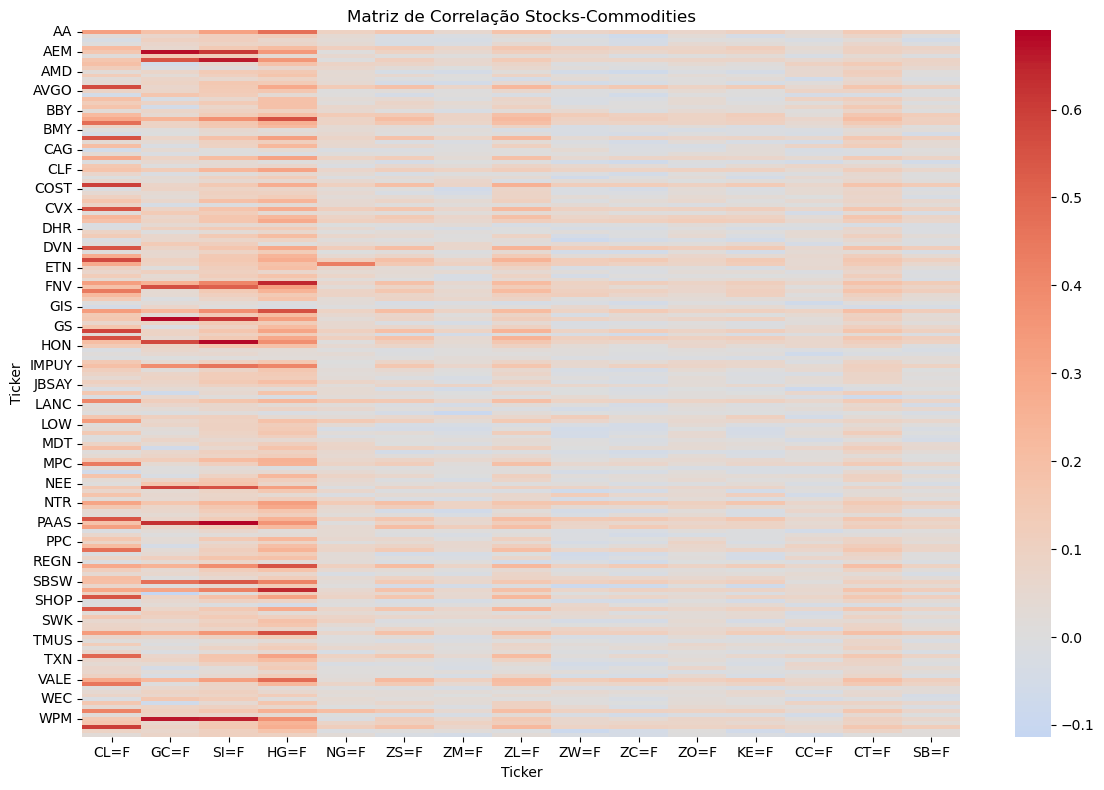


Processo concluído. Resultados salvos em CSV.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações iniciais
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Lista de tickers (a mesma que você forneceu)
stock_tickers =  [
    # === Energia (Petróleo & Gás) ===
    'XOM', 'CVX', 'SHEL', 'BP', 'TTE', 'COP', 'OXY', 'PBR', 'VLO', 'PSX', 'MPC', 'EOG', 
    'HES', 'DVN', 'KMI', 'WMB', 'LNG', 'EQT', 'SWN', 'APA', 'HAL', 'SLB', 'BKR', 'FTI',

    # === Metais & Mineração ===
    'NEM', 'GOLD', 'AEM', 'FNV', 'WPM', 'PAAS', 'AG', 'HL', 'FCX', 'SCCO', 'AA', 'RIO', 
    'BHP', 'VALE', 'GLNCY', 'LAC', 'MP', 'SBSW', 'IMPUY', 'TECK', 'CSTM', 'CLF', 'X', 'NUE',

    # === Agronegócio & Alimentos ===
    'ADM', 'BG', 'DE', 'NTR', 'TSN', 'JBSAY', 'HRL', 'SJM', 'CAG', 'GIS', 'K', 'HSY', 'MDLZ',
    'BYND', 'DAR', 'INGR', 'PPC', 'SAFM', 'PPC', 'CALM', 'LANC',

    # === Gigantes de Tecnologia ===
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'AMD', 'AVGO', 'QCOM',
    'TXN', 'ADBE', 'CRM', 'ORCL', 'IBM', 'CSCO', 'NOW', 'UBER', 'LYFT', 'SHOP', 'SQ', 'PYPL',

    # === Bens Industriais & Materiais ===
    'CAT', 'BA', 'MMM', 'HON', 'GE', 'DE', 'LMT', 'RTX', 'GD', 'NOC', 'EMR', 'ITW', 'FAST',
    'DOV', 'ETN', 'PH', 'AME', 'ROK', 'SWK',

    # === Varejo & Consumo ===
    'WMT', 'TGT', 'COST', 'HD', 'LOW', 'AMZN', 'SBUX', 'MCD', 'YUM', 'DPZ', 'CMG', 'NKE',
    'ULTA', 'TIF', 'BBY', 'DG', 'DLTR', 'F', 'GM', 'TSLA', 'RIVN', 'LCID',

    # === Saúde & Biotech ===
    'JNJ', 'PFE', 'MRK', 'ABT', 'AMGN', 'GILD', 'BMY', 'UNH', 'LLY', 'REGN', 'VRTX', 'MRNA',
    'BNTX', 'CVS', 'WBA', 'DHR', 'SYK', 'MDT', 'ISRG', 'ZTS',

    # === Financeiro & Seguros ===
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'V', 'MA', 'PYPL', 'SQ',
    'MET', 'PRU', 'AIG', 'ALL', 'TRV', 'PGR',

    # === Serviços & Utilities ===
    'NEE', 'DUK', 'SO', 'D', 'AEP', 'EXC', 'SRE', 'WEC', 'AWK', 'ECL', 'RSG', 'WM', 'CNC',
    'CI', 'HUM', 'ANTM', 'DISH', 'T', 'VZ', 'TMUS', 'CHTR', 'CMCSA',
]
commodity_tickers = ['CL=F', 'GC=F', 'SI=F', 'HG=F', 'NG=F', 'ZS=F', 'ZM=F', 'ZL=F', 'ZW=F', 'ZC=F', 'ZO=F', 'KE=F', 'CC=F', 'CT=F', 'SB=F']

# Baixar os dados
print("Baixando dados...")
data = yf.download(stock_tickers + commodity_tickers, start="2020-01-01", end="2025-01-01", progress=False)['Close']

# Remover colunas com muitos valores faltantes
data_cleaned = data.dropna(axis=1, thresh=int(0.8 * len(data)))

# Preencher valores faltantes restantes (método linear)
data_filled = data_cleaned.interpolate(method='linear')

# Calcular retornos diários
returns = data_filled.pct_change().dropna()

# Separar stocks e commodities
stock_returns = returns[[col for col in returns.columns if col not in commodity_tickers]]
commodity_returns = returns[commodity_tickers]

# Calcular matriz de correlação cruzada
correlation_matrix = pd.DataFrame(index=stock_returns.columns, columns=commodity_returns.columns)

print("Calculando correlações...")
for stock in stock_returns.columns:
    for commodity in commodity_returns.columns:
        corr = np.corrcoef(stock_returns[stock], commodity_returns[commodity])[0, 1]
        correlation_matrix.loc[stock, commodity] = corr

# Converter para float
correlation_matrix = correlation_matrix.astype(float)

# Encontrar os pares mais correlacionados
print("\nTop 20 pares mais correlacionados:")
top_pairs = correlation_matrix.stack().sort_values(ascending=False).head(20)
print(top_pairs)

# Visualização dos melhores pares
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação Stocks-Commodities')
plt.tight_layout()
plt.show()

# Salvar resultados em CSV
correlation_matrix.to_csv('stock_commodity_correlations.csv')
top_pairs.to_csv('top_stock_commodity_pairs.csv')

print("\nProcesso concluído. Resultados salvos em CSV.")

dbscan

Aumentar o valor de min_samples — Isso exige mais ativos para formar um cluster, reduzindo a quantidade de clusters pequenos.

Diminuir o valor de eps — Isso torna o critério de agrupamento mais rigoroso, formando menos clusters.

Filtrar por correlação mínima — Definir um limite mínimo de correlação (por exemplo, corr > 0.7) antes de aplicar o DBSCAN.

Remover redundância nos pares — Eliminar pares duplicados e manter apenas uma direção (exemplo: (A, B) e não (B, A)).

In [ ]:
from sklearn.cluster import DBSCAN
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import yfinance as yf

# Baixar os dados
all_tickers = stock_tickers + commodity_tickers
data = yf.download(all_tickers, start="2020-01-01", end="2025-01-01", progress=False)['Close']
data_cleaned = data.dropna(axis=1, how='all')

# Calcular a correlação de Pearson
correlation_matrix = data_cleaned.corr().abs()

# Transformar a matriz de correlação em uma matriz de distância (1 - correlação)
distance_matrix = 1 - correlation_matrix

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='precomputed')
labels = dbscan.fit_predict(distance_matrix)

# Criar um DataFrame para visualizar os clusters
clusters = pd.DataFrame({'Ticker': distance_matrix.index, 'Cluster': labels})

# Filtrar pares com um ticker de commodity e um de ação
pairs = []
for cluster in clusters['Cluster'].unique():
    if cluster != -1:  # Ignorar ruído
        cluster_tickers = clusters[clusters['Cluster'] == cluster]['Ticker'].tolist()
        for ticker1 in cluster_tickers:
            for ticker2 in cluster_tickers:
                if ticker1 != ticker2:
                    if (ticker1 in commodity_tickers and ticker2 in sp500_tickers) or (ticker1 in sp500_tickers and ticker2 in commodity_tickers):
                        pairs.append((ticker1, ticker2))

print(f"Pares encontrados: {pairs}")


149 Failed downloads:
['NEE', 'CAG', 'MP', 'AEM', 'KMI', 'FNV', 'D', 'REGN', 'QCOM', 'GOLD', 'COST', 'NUE', 'MRNA', 'AIG', 'BNTX', 'SQ', 'AWK', 'TGT', 'WBA', 'JNJ', 'GS', 'HON', 'HAL', 'DOV', 'PGR', 'DPZ', 'TSLA', 'PH', 'LANC', 'FTI', 'SWN', 'ULTA', 'UNH', 'PRU', 'LLY', 'CMCSA', 'HL', 'CLF', 'BA', 'MMM', 'SHOP', 'NKE', 'VRTX', 'X', 'LOW', 'DHR', 'DLTR', 'CC=F', 'LNG', 'SHEL', 'ALL', 'ISRG', 'APA', 'AXP', 'SJM', 'MSFT', 'LCID', 'META', 'BYND', 'SLB', 'PBR', 'CVS', 'HD', 'EXC', 'AMGN', 'DISH', 'BBY', 'BHP', 'MS', 'ETN', 'BKR', 'WM', 'AG', 'GD', 'ZW=F', 'AVGO', 'VALE', 'PAAS', 'FCX', 'DVN', 'T', 'NEM', 'ZL=F', 'SCCO', 'MDLZ', 'WEC', 'INTC', 'SBSW', 'LAC', 'NVDA', 'TTE', 'BAC', 'AA', 'AME', 'YUM', 'TRV', 'C', 'DUK', 'HG=F', 'GC=F', 'ITW', 'MCD', 'HES', 'SO', 'UBER', 'ROK', 'DE', 'K', 'MPC', 'WPM', 'EQT', 'NOC', 'CT=F', 'SWK', 'GIS', 'FAST', 'AMZN', 'CSCO', 'GILD', 'AMD', 'ADM', 'TECK', 'NG=F', 'PYPL', 'EMR', 'VZ', 'BLK', 'CRM', 'DG', 'SB=F', 'NOW', 'ABT', 'MDT', 'TSN', 'CVX', 'RTX', 'LYFT

Pares encontrados: []
